# Исследование рынка компьютерных игр

## Изучение данных


In [1]:
# Загрузим библиотеки и прочитаем файл
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

data = pd.read_csv('/datasets/games.csv')
# Посмотрим начало и конец таблицы, общую информацию о таблице и ее размер.
display(data.head(10))
display(data.tail(10))
data.info()
data.shape
# Посмотрим, какие значения и в каком количестве есть в отдельных столбцах таблицы.
for column in data.columns:
    display(data[column].value_counts())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,NaN
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.0,NaN,tbd,T
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Need for Speed: Most Wanted             12
FIFA 14                                  9
LEGO Marvel Super Heroes                 9
Ratatouille                              9
Madden NFL 07                            9
                                        ..
Imagine: My Restaurant                   1
G-Police: Weapons of Justice             1
Bravely Second: End Layer                1
Kaboom!                                  1
Jak and Daxter: The Precursor Legacy     1
Name: Name, Length: 11559, dtype: int64

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: Year_of_Release, dtype: int64

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

0.00    4508
0.02     576
0.03     561
0.04     549
0.01     545
        ... 
4.98       1
4.21       1
6.82       1
5.05       1
9.00       1
Name: NA_sales, Length: 402, dtype: int64

0.00    5870
0.01    1494
0.02    1308
0.03     926
0.04     709
        ... 
3.59       1
4.02       1
2.24       1
2.27       1
3.75       1
Name: EU_sales, Length: 307, dtype: int64

0.00    10514
0.02      741
0.01      706
0.03      546
0.04      397
        ...  
1.16        1
2.12        1
7.20        1
2.17        1
6.50        1
Name: JP_sales, Length: 244, dtype: int64

0.00    6601
0.01    3464
0.02    1618
0.03     926
0.04     654
        ... 
0.96       1
1.93       1
0.97       1
1.37       1
1.06       1
Name: Other_sales, Length: 155, dtype: int64

70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
20.0      3
17.0      1
22.0      1
13.0      1
21.0      1
Name: Critic_Score, Length: 82, dtype: int64

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.5       2
0.3       2
0.9       2
9.7       1
0         1
Name: User_Score, Length: 96, dtype: int64

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

**Выводы**

Мы видим, что колонка, содержащая информацию о годе релиза, имеет неверный формат. Номер года может быть только целым. Данные в столбце с оценкой критиков содержат ноль после запятой. Очевидно, что эти оценки являются целыми числами. Данные в столбце с оценкой пользователей имеют формат object, что не позволит производить вычисления. Незначительное число строк не содержит информацию о годе выхода игры, названиях и жанре. Существенное количество данных имеет нулевые значения в столбцах Critic_Score, User_Score, Rating.

Мы видим, что наибольшее количество значений в столбце User_Score равно tbd, что означает, данные должны быть определены.

## Предобработка данных

In [2]:
# Посчитаем количество дубликатов набором методов data.duplicated().sum().
print(data.duplicated().sum())

# Заменим названия столбцов (приведите к нижнему регистру)
data.columns = map(str.lower, data.columns)

# Удалим строки, где пропущены названия и год выпуска игры
data.dropna(subset = ['year_of_release'], inplace = True)
data.dropna(subset = ['name'], inplace = True)

# Заменим аббревиатуру tbd на NaN
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

# Заменим пропущенные значения в столбцах critic_score и user_score на медианы по видам жанров
for genre in data['genre'].unique():
    median = data.loc[data['genre'] == genre, 'critic_score'].median()
    data.loc[(data['genre'] == genre) & (data['critic_score'].isna()), 'critic_score'] = median

    median = data.loc[data['genre'] == genre, 'user_score'].median()
    data.loc[(data['genre'] == genre) & (data['user_score'].isna()), 'user_score'] = median

# Преобразуем данные в нужные типы
data = data.astype({ "year_of_release": "int", "critic_score": "int"})

# Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

# Посмотрим, что получилось
display(data.head())
data.info()

0


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69,7.7,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,74,7.8,NaN,31.38


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       16444 non-null int64
user_score         16444 non-null float64
rating             9768 non-null object
total_sales        16444 non-null float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.6+ MB


**Выводы** 

Дубликатов на обнаружено. Мы заменили тип данных в столбцах year_of_release, т.к. год обозначается только целым числом, и critic_score, т.к. изучая полученные данные заметили, что оценка критиков всегда выражена целым числом. 

Мы удалили строки с отсутствующими данными, что не может существенно повлиять на результаты анализа.

Существенное количество данных имеет нулевые значения в столбцах Critic_Score, User_Score, Rating. Мы не будем удалять эти строки. Посчитали средние и медианы для указанных столбцов. Данные показатели отличаются незначительно, поэтому для заполнения нулевых значений выбрали медиану в обоих случаях. 

Наибольшее количество значений в столбце User_Score равно tbd. Фактически, это значает отсутствие данных, поэтому указанную аббревиатуру заменили на NaN двумя способами: функциям replace или pd.to_numeric, одновременно поменяв тип данных указанного столбца.

Посчитали суммарные продажи во всех регионах и записали их в отдельный столбец

## Исследовательский анализ данных

In [3]:
# Посмотрим, сколько игр выпускалось в разные годы
display(data.groupby('year_of_release')['year_of_release'].count())

# Построим рейтинг платформ по объему продаж
platform_sales = data.pivot_table(index=['platform'], values='total_sales', 
                                       aggfunc='sum').sort_values(by='total_sales', ascending = False)
display(platform_sales)

# Отберем платформы с объемом продаж более 100 млн. копий
platform_sales_top = platform_sales[platform_sales['total_sales'] > 100]
display(platform_sales_top)

# Сформируем таблицу, в которой платформы разработаны после 2001 года и копий которых продано более 100 млн.
data_top = data.query("year_of_release >= 2001 and platform in @platform_sales_top.index")
display(data_top.head())
    
# Построим таблицу распределения по годам объемов продаж топовых платформ
data_platform_sales_top = data_top.pivot_table(index=['year_of_release'], 
                                         columns = ['platform'], values='total_sales', aggfunc='count')
display(data_platform_sales_top)
data_platform_sales_top.info()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: int64

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91


platform,3DS,DS,GB,GBA,GC,N64,PC,PS,PS2,PS3,PS4,PSP,Wii,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,
2001,NaN,NaN,10.0,107.0,22.0,9.0,15.0,91.0,185.0,NaN,NaN,NaN,NaN,NaN,33.0,NaN
2002,NaN,NaN,NaN,198.0,152.0,1.0,19.0,20.0,280.0,NaN,NaN,NaN,NaN,NaN,158.0,NaN
2003,NaN,NaN,NaN,150.0,144.0,NaN,33.0,3.0,256.0,NaN,NaN,NaN,NaN,NaN,189.0,NaN
2004,NaN,23.0,NaN,175.0,83.0,NaN,30.0,NaN,259.0,NaN,NaN,15.0,NaN,NaN,177.0,NaN
2005,NaN,118.0,NaN,135.0,97.0,NaN,37.0,NaN,260.0,NaN,NaN,95.0,NaN,18.0,179.0,NaN
2006,NaN,201.0,NaN,39.0,40.0,NaN,52.0,NaN,259.0,27.0,NaN,189.0,44.0,93.0,62.0,NaN
2007,NaN,376.0,NaN,6.0,4.0,NaN,62.0,NaN,214.0,90.0,NaN,133.0,185.0,123.0,3.0,NaN
2008,NaN,492.0,NaN,NaN,NaN,NaN,76.0,NaN,191.0,138.0,NaN,100.0,282.0,146.0,1.0,NaN
2009,NaN,403.0,NaN,NaN,NaN,NaN,107.0,NaN,96.0,162.0,NaN,161.0,325.0,172.0,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 2001 to 2016
Data columns (total 16 columns):
3DS     6 non-null float64
DS      10 non-null float64
GB      1 non-null float64
GBA     7 non-null float64
GC      7 non-null float64
N64     2 non-null float64
PC      16 non-null float64
PS      3 non-null float64
PS2     11 non-null float64
PS3     11 non-null float64
PS4     4 non-null float64
PSP     12 non-null float64
Wii     11 non-null float64
X360    12 non-null float64
XB      8 non-null float64
XOne    4 non-null float64
dtypes: float64(16)
memory usage: 2.1 KB


**Определение актуального периода**

Проанализировав сводную таблицу выше, а также информацию о сводной таблице, мы видим количество ненулевых значений по каждой платформе, можно сделать вывод, что характерный и актуальный период существования платформы - 5 лет.

In [4]:
# Возьмем данные за актуальный период - 5 лет
data_actual = data.query("year_of_release >= 2012")
data_actual_pivot = data_actual.pivot_table(index=['year_of_release'], 
                                         columns = ['platform'], values='total_sales', aggfunc='sum')
display(data_actual_pivot)

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51.36,11.01,23.22,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0, 'Платформы')

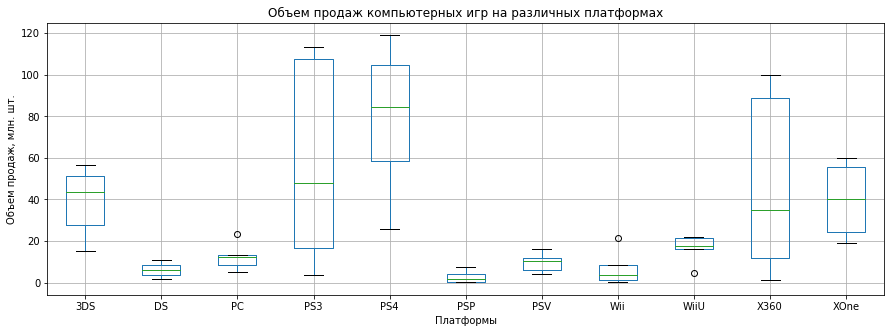

In [5]:
import matplotlib.pyplot as plt
# Построим "диаграмму ящик с усами" для всех платформ за актуальный период
data_actual_pivot.boxplot(figsize=(15,5)).set_title('Объем продаж компьютерных игр на различных платформах')
plt.ylabel('Объем продаж, млн. шт.')
plt.xlabel('Платформы')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83,4.8,M,13.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73,2.6,M,10.24
66,Halo 4,X360,2012,Shooter,6.65,2.28,0.04,0.74,87,7.0,M,9.71
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,69,7.1,NaN,9.18


,sum_total_sales,mean_critic_score,mean_user_score
year_of_release,,,
2012,99.74,71.924528,6.684906
2013,88.58,71.386667,6.512000
2014,34.74,67.523810,6.258730
2015,11.96,70.285714,6.280000
2016,1.52,71.615385,5.676923


0.32768748226351774

0.8624875338061013

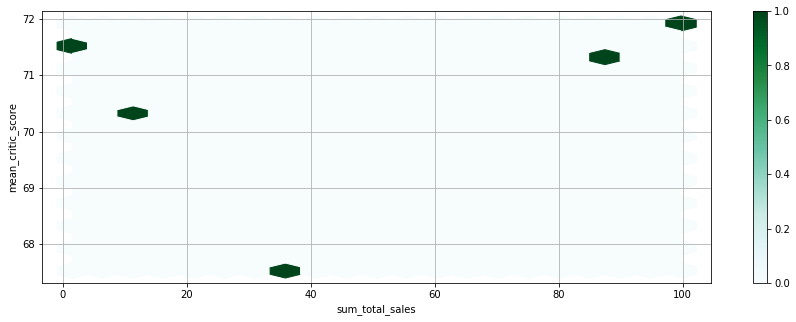

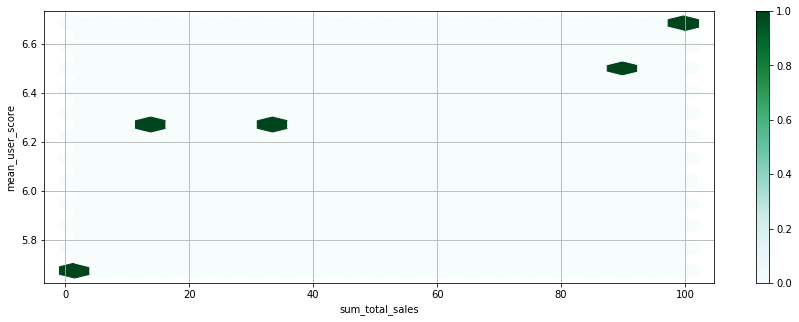

In [6]:
#Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 

# Сформируем таблицу по платформе Х360
data_X360 = data_actual[data_actual['platform'] == 'X360']
display(data_X360.head())

# Сформируем сводную таблицу по платформе Х360, посчитав сумму продаж и оценок критиков и пользователей
data_X360_pivot = data_X360.pivot_table(index=['year_of_release'], values=['total_sales', 'critic_score', 'user_score'], 
                                                                           aggfunc=['sum', 'mean'])


# Переименуем столбцы, удалим не нужные
data_X360_pivot.columns = ['sum_critic_score', 'sum_total_sales', 'sum_user_score', 
                           'mean_critic_score', 'mean_total_sales', 'mean_user_score']

data_X360_pivot.drop(['sum_critic_score', 'sum_user_score', 'mean_total_sales'], axis = 1, inplace = True)
display(data_X360_pivot)

# Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами по платформе Х360
data_X360_pivot.plot(x='sum_total_sales', y='mean_critic_score', kind='hexbin', gridsize=20, figsize=(15, 5), 
                     sharex=False, grid=True) 
data_X360_pivot.plot(x='sum_total_sales', y='mean_user_score', kind='hexbin', gridsize=20, figsize=(15, 5), 
                     sharex=False, grid=True) 

display(data_X360_pivot['sum_total_sales'].corr(data_X360_pivot['mean_critic_score']))
display(data_X360_pivot['sum_total_sales'].corr(data_X360_pivot['mean_user_score']))

In [7]:
display(data_X360_pivot.corr())

,sum_total_sales,mean_critic_score,mean_user_score
sum_total_sales,1.000000,0.327687,0.862488
mean_critic_score,0.327687,1.000000,0.062854
mean_user_score,0.862488,0.062854,1.000000


In [8]:
# Посмотрим на общее распределение игр по жанрам и по продажам
data_genre = data_actual.groupby('genre')['genre'].count().sort_values(ascending = False)
display(data_genre)

data_genre_pivot_1 = data_actual.pivot_table(index=['genre'], values='total_sales', aggfunc='sum').sort_values(by = 'total_sales', 
                                                                                                      ascending = False)
display(data_genre_pivot_1)

data_genre_pivot_2 = data_actual.pivot_table(index=['genre'], values='total_sales', aggfunc='median').sort_values(by = 'total_sales', 
                                                                                                      ascending = False)
display(data_genre_pivot_2)

genre
Action          1031
Role-Playing     370
Adventure        302
Sports           268
Shooter          235
Misc             192
Racing           115
Fighting         109
Platform          85
Simulation        80
Strategy          71
Puzzle            28
Name: genre, dtype: int64

,total_sales
genre,
Action,441.12
Shooter,304.73
Role-Playing,192.80
Sports,181.07
Misc,85.04
Platform,61.00
Racing,53.50
Fighting,44.49
Simulation,35.12


,total_sales
genre,
Shooter,0.440
Sports,0.240
Platform,0.210
Role-Playing,0.140
Racing,0.140
Fighting,0.130
Action,0.120
Misc,0.120
Simulation,0.120


**Выводы**

Мы определили, сколько игр выпускалось в разные годы, можно сделать вывод, что для анализа важны данные начиная с 2001 года. 
Мы сформировали рейтинг платформ по объему продаж. Самыми популярными являются PS2, X360, PS3, Wii, DS, отобрали платформы с объемом продаж более 100 млн. копий, интересные нам для анализа. Мы видим, что характерный срок появления новых и исчезновения старых платформ составляет 5 лет.

Далее мы сформировали таблицу, в которой платформы разработаны после 2012 года и копий которых продано более 100 млн., а также таблицу распределения по годам объемов продаж топовых платформ. 
Из сводной таблицы за актуальный период видно, что растущими являются платформа XOne и, возможно, платформы PS4 и WiiU, если данные за 2016 год не полные. Эти платформы можно считать потенциально прибыльными. Снижение продаж наблюдается по платформам PS3, 3DS, Wii, X360.

Диаграмма «Ящик с усами» мы видим самую высокую медиану (около 85) и значительный разброс данных по платформе PS4. Данные со значительным размер «ящика» говорят о том, что платформа больше не используется или прекращает своё существование, например PS3, X360.

Мы построили диаграммы рассеяния и рассчитали коэффициенты корреляции между отзывами и продажами по  популярной платформе Х360. Можно сделать вывод, что имеется несущественная зависимость между объемами продаж игр на платформе и отзывами критиков. Зависимость между оценкой пользователей и объемами продаж игр на платформе более существенная существенная. Если посмотреть на изменение оценок пользователей, то можно заметить, что оно имеет устойчивый нисходящий тренд.
С учетом того, что продажи игр на всех исследуемых платформах в основном имеют нормальное распределение, данные выводы по платформе Х360 можно экстраполировать и на остальные платформы.

Мы построили таблицу распределения игр по жанрам. Чаще всего потребители покупают игры в жанрах Action, Role-Playing, Adventure, Sports, Shooter.А вот наиболее прибыльными являются игры с жанрами  Action, Shooter, Role-Playing, Sports, Misc. 
В расчете на единицу игры лидерами по объему продаж становятся Shooter, Sports, Platform, Role-Playing, Racing.

## Составление портрета пользователя каждого региона

In [9]:
# Составим словарь столбцов с регионами
regions = ['eu_sales', 'na_sales', 'jp_sales']

# Сделаем сводную таблицу по платформам с указанием объема продаж в регионе, средней доли продаж и определим топ-5
for region in regions:
    data_platform_region = data_actual.pivot_table(index=['platform'], values=region, aggfunc='sum').sort_values(by = region, 
                                                                                                          ascending = False)
    data_platform_top = data_platform_region[:5]
    data_platform_top['part_sales'] = data_platform_top[region] / data[region].sum()
    display(data_platform_top)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,eu_sales,part_sales
platform,,
PS4,141.09,0.058795
PS3,106.86,0.044531
X360,74.52,0.031054
XOne,51.59,0.021499
3DS,42.64,0.017769


,na_sales,part_sales
platform,,
X360,140.05,0.032259
PS4,108.74,0.025047
PS3,103.38,0.023812
XOne,93.12,0.021449
3DS,55.31,0.012740


,jp_sales,part_sales
platform,,
3DS,87.79,0.068021
PS3,35.29,0.027343
PSV,21.04,0.016302
PS4,15.96,0.012366
WiiU,13.01,0.010080


In [10]:
# Сделаем сводную таблицу по жанрам с указанием объема продаж по регионам 
data_genre_regions = data_actual.pivot_table(index=['genre'], values=['na_sales', 'eu_sales', 'jp_sales'], 
                                 aggfunc='sum').sort_values(by = 'na_sales', ascending = False)
display(data_genre_regions)

# Определим топ-5 жанров по продажам для каждого региона
for region in regions:
    data_genre_region = data_actual.pivot_table(index=['genre'], values=region, aggfunc='sum').sort_values(by = region, 
                                                                                                    ascending = False)
    data_genre_top = data_genre_region[:5]
    display(data_genre_top)

,eu_sales,jp_sales,na_sales
genre,,,
Action,159.34,52.80,177.84
Shooter,113.47,9.23,144.77
Sports,69.09,8.01,81.53
Role-Playing,48.53,65.44,64.00
Misc,26.32,12.86,38.19
Platform,21.41,8.63,25.38
Fighting,10.79,9.44,19.79
Racing,27.29,2.50,17.22
Adventure,9.46,8.24,8.92


,eu_sales
genre,
Action,159.34
Shooter,113.47
Sports,69.09
Role-Playing,48.53
Racing,27.29


,na_sales
genre,
Action,177.84
Shooter,144.77
Sports,81.53
Role-Playing,64.00
Misc,38.19


,jp_sales
genre,
Role-Playing,65.44
Action,52.80
Misc,12.86
Simulation,10.41
Fighting,9.44


In [11]:
data_actual['rating'].fillna('undefined', inplace = True)
display(data_actual.head())

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,73,7.4,undefined,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,74,7.8,undefined,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79


In [12]:
# Сделаем сводную таблицу по рейтингу ESRB с указанием объема продаж по регионам 
data_rating_regions = data_actual.pivot_table(index=['rating'], values=['na_sales', 'eu_sales', 'jp_sales'], 
                                 aggfunc='sum').sort_values(by = 'na_sales', ascending = False)
display(data_rating_regions)

# Определим распределение продаж для каждого региона по рейтингу ESRB
for region in regions:
    data_rating_region = data_actual.pivot_table(index=['rating'], values=region, aggfunc='sum').sort_values(by = region, 
                                                                                                    ascending = False)
    display(data_rating_region)

,eu_sales,jp_sales,na_sales
rating,,,
M,193.96,21.20,231.57
E,113.03,28.33,114.37
undefined,91.50,108.84,103.31
E10+,55.37,8.19,75.70
T,52.96,26.02,66.02


,eu_sales
rating,
M,193.96
E,113.03
undefined,91.50
E10+,55.37
T,52.96


,na_sales
rating,
M,231.57
E,114.37
undefined,103.31
E10+,75.70
T,66.02


,jp_sales
rating,
undefined,108.84
E,28.33
T,26.02
M,21.20
E10+,8.19


**Вывод**

Мы определили для пользователя каждого региона (NA, EU, JP): самые популярные платформы (топ-5) и их доли продаж, самые популярные жанры (топ-5), составили таблицу продаж для рейтинга ESRB.

В результате проведенного анализа мы выявили, что доли продаж игр на отдельных платформах различаются в зависимости от региона. Так, например, игры на платформе PS4 в Северной Америке занимают самую существенную долю - почти 6%, в Европе эта платформа на втором месте - 2,5%, а в Японии эта платформа уже на 4-м месте с долей около 1%. Аналогичные расхождения в долях продаж видны и по другим платформам.

Сделав сводную таблицу по жанрам и регионам продаж и отсортировав ее по убыванию для Северной Америки мы видим схожесть рейтинга для Европы и Северной Америки, при этом просматриваются существенные отличия для Японии. Это также наглядно видно из таблиц топ-5 по жанрам для каждого региона. Например, жанр Role-Playing в Японии занимает первое место, а в Европе и Северной Америке этот жанр занимает только четвертое место. Данный факт может быть объяснен культурными различиями стран Запада и Востока.

Мы сформировали таблицы по распределению продаж для каждого региона по рейтингу ESRB. Можно сделать вывод, что рейтинг ESRB оказывает некоторое влияние на продажи: в таблицах по Европе и Северной Америке игры без возрастного рейтинга занимают третье место, а в Японии игры без рейтинга занимают первое место с отрывом более чем в 4 раза от второго места.

## Проверка гипотез

In [13]:
# Сформируем таблицы по двум исследуемым платформам
data_XOne = data_actual[data_actual['platform'] == 'XOne']
data_PC = data_actual[data_actual['platform'] == 'PC']

# Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
# Адтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC различаются.
# Проверим нулевую гипотезу и посчитаем средний рейтинг
alpha = 0.01 
results = st.ttest_ind(data_XOne['user_score'], data_PC['user_score'])
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    
display(data_XOne['user_score'].mean())
display(data_PC['user_score'].mean())

p-значение: 0.2524258657195587
Не получилось отвергнуть нулевую гипотезу


6.7615384615384615

6.615600000000001

In [14]:
# Сформируем таблицы по двум исследуемым жанрам
data_Action = data_actual[data_actual['genre'] == 'Action']
data_Sports = data_actual[data_actual['genre'] == 'Sports']

# Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports одинаковые.
# Адтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports разные.
# Проверим нулевую гипотезу и посчитаем средний рейтинг
alpha = 0.1 
results = st.ttest_ind(data_Action['user_score'], data_Sports['user_score'])
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    
display(data_Action['user_score'].mean())
display(data_Sports['user_score'].mean())

p-значение: 6.70766861002191e-40
Отвергаем нулевую гипотезу


7.108341416100874

5.985447761194029

**Выводы**

Нулевая гипотеза должна содержать равенство. Мы видим, что средние пользовательские рейтинги платформ Xbox One и PC практически не различаются. Показатель альфа установлен на давольно низком уровне: 0,01. Нулеавя гипотеза подтверждена.
В случае с определением разницы средних пользовательских рейтингов жанров Action и Sports мы видим, что средние рейтинги отличаются существенно, таким образом, нулевая гипотеза отвергнута.


## Oбщий вывод

При изучении данных мы выявили ряд существенных недостатков, которые нам предстояло устранить.

Осуществляя предобработку данных, мы заполнили имеющиеся пустые значения, которые согли возникнуть в результате ошибок загрузки данных либо просто из-за их отсутствия. Дубликатов обнаружено не было. Также было посчитаны суммарные продажи во всех регионах и записаны в отдельный столбец.

В ходе анализа данных мы выявили актуальный период для анализа данных - 5 лет, определили растущие и потенциально прибыльные платформы, платформы игры на которых теряют свою популярность. С помощью диаграмм рассеяния определили, что имеется несущественная зависимость между объемами продаж игр на популярной платформе Х360 и отзывами критиков, а зависимость между оценкой пользователей и объемами продаж игр на платформе более существенная.
Удалось установить, что чаще всего потребители покупают игры в жанрах Action, Role-Playing, Adventure, Sports, Shooter.А вот наиболее прибыльными являются игры с жанрами  Action, Shooter, Role-Playing, Sports, Misc. 
В расчете на единицу игры лидерами по объему продаж становятся Shooter, Sports, Platform, Role-Playing, Racing.

В результате проведенного анализа мы выявили, что доли продаж игр на отдельных платформах различаются в зависимости от региона. Так, например, игры на платформе PS4 в Северной Америке занимают самую существенную долю - почти 6%, в Европе эта платформа на втором месте - 2,5%, а в Японии эта платформа уже на 4-м месте с долей около 1%. Аналогичные расхождения в долях продаж видны и по другим платформам.

Сделав сводную таблицу по жанрам и регионам продаж и отсортировав ее по убыванию для Северной Америки мы видим схожесть рейтинга для Европы и Северной Америки, при этом просматриваются существенные отличия для Японии. Это также наглядно видно из таблиц топ-5 по жанрам для каждого региона. Например, жанр Role-Playing в Японии занимает первое место, а в Европе и Северной Америке этот жанр занимает только четвертое место. Данный факт может быть объяснен культурными различиями стран Запада и Востока.

Мы сформировали таблицы по распределению продаж для каждого региона по рейтингу ESRB. Можно сделать вывод, что рейтинг ESRB оказывает некоторое влияние на продажи: в таблицах по Европе и Северной Америке игры без возрастного рейтинга занимают третье место, а в Японии игры без рейтинга занимают первое место с отрывом более чем в 4 раза от второго места.

Мы определили, что средние пользовательские рейтинги платформ Xbox One и PC практически не различаются, а средние пользовательские рейтинги жанров Action и Sports отличаются существенно.